<a href="https://colab.research.google.com/github/markusloecher/DataScience2021/blob/main/TWSM/Class3_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')
TWSM_path = "/content/drive/MyDrive/teaching/TWSM/WorkInClass/"

#from TWSM import *
from tensorflow import keras
from tensorflow.keras import layers


### Data Sets

#### IMD Movie Reviews


In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
N=len(train_data)
decoded_reviews = ["" for x in range(N)]

for j in range(N):
  decoded_reviews[j] = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[j]])

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Tasks

1. Fit a Naive Bayes model on one hot encoding
2. Create a tf-idf matrix instead
3. Fit a Naive Bayes model again

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

### Validation


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Predict the Test set results, determine accuracy
y_pred_s = clf.predict(x_test)
print('Train accuracy: ', clf.score(x_train, y_train))
print('Test accuracy: ', accuracy_score(y_pred_s, y_test))

Train accuracy:  0.86884
Test accuracy:  0.83936


In [ ]:
# Show the confusion matrix
print(classification_report(y_test, y_pred_s))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.84     12500
         1.0       0.87      0.80      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



In [ ]:
# Initialise the transformer
vec=TfidfVectorizer(max_df=0.9, min_df=0.01)

# Apply it to the data
x_train_tfidf=vec.fit_transform(decoded_reviews).toarray()

In [ ]:
#test data
N=len(test_data)
decoded_reviews_test = ["" for x in range(N)]

for j in range(N):
  decoded_reviews_test[j] = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in test_data[j]])

In [ ]:
# Apply it to the data
x_test_tfidf=vec.transform(decoded_reviews_test).toarray()

In [ ]:
clf2 = MultinomialNB()
clf2.fit(x_train_tfidf, y_train)


MultinomialNB()

In [ ]:
# Predict the Test set results, determine accuracy
y_pred_tfidf = clf2.predict(x_test_tfidf)
print('Train accuracy: ', clf2.score(x_train_tfidf, y_train))
print('Test accuracy: ', accuracy_score(y_pred_tfidf, y_test))

Train accuracy:  0.85084
Test accuracy:  0.84484


## Neural Networks, keras

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.5011 - accuracy: 0.7829 - val_loss: 0.3710 - val_accuracy: 0.8708
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2927 - accuracy: 0.9027 - val_loss: 0.3008 - val_accuracy: 0.8864
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2108 - accuracy: 0.9302 - val_loss: 0.2781 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1676 - accuracy: 0.9460 - val_loss: 0.2756 - val_accuracy: 0.8908
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1350 - accuracy: 0.9571 - val_loss: 0.2998 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1110 - accuracy: 0.9636 - val_loss: 0.3029 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0926 - accuracy: 0.9714 - val_loss: 0.3203 - val_accuracy: 0.8825
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

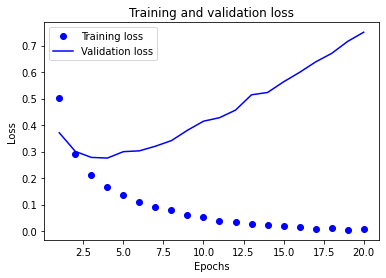

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

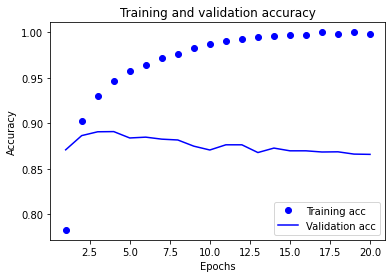

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 20-Newsgroups 

In this exercise, we will be using the 20-Newsgroups dataset. This version of the dataset contains about 11k newsgroups posts from 20 different topics.

In [ ]:
# Import packages
import pandas as pd
import re
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, remove_stopwords, strip_short, stem_text
import pickle
import en_core_web_sm
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords

# 1. Import and examine data

In [ ]:
# Import dataset
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
df.head()

In [ ]:
# Examine dataset
print('Possible tagret values:')
print(df.target_names.unique())
print(' ')
print('Class distribution:')
print(df.target_names.value_counts())

*The classes are almost uniformly distributed.*